## Download the dataset

In [ ]:
# Download the dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Unzip the dataset
!unzip chest-xray-pneumonia.zip

# Remove the zip file
!rm chest-xray-pneumonia.zip

## Load and Preprocess the Dataset

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up directories
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

# Image data generator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Define and Train the Model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator)

Epoch 1/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 54s 192ms/step - accuracy: 0.8012 - loss: 0.4778 - val_accuracy: 0.7500 - val_loss: 0.3778
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 45s 167ms/step - accuracy: 0.9529 - loss: 0.1379 - val_accuracy: 0.8750 - val_loss: 0.1718
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 81s 166ms/step - accuracy: 0.9660 - loss: 0.0873 - val_accuracy: 0.9375 - val_loss: 0.2553
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 81s 162ms/step - accuracy: 0.9757 - loss: 0.0655 - val_accuracy: 0.9375 - val_loss: 0.1755
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 83s 163ms/step - accuracy: 0.9809 - loss: 0.0588 - val_accuracy: 1.0000 - val_loss: 0.0592


## Evaluate the Model

In [9]:
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print(f'Test accuracy: {test_acc}')

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.8010 - loss: 0.8869 
Test accuracy: 0.7964743375778198


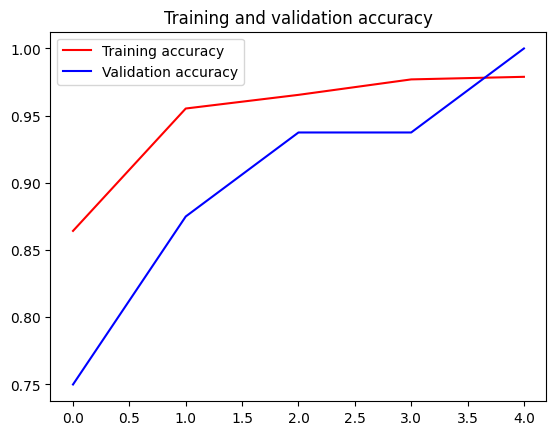

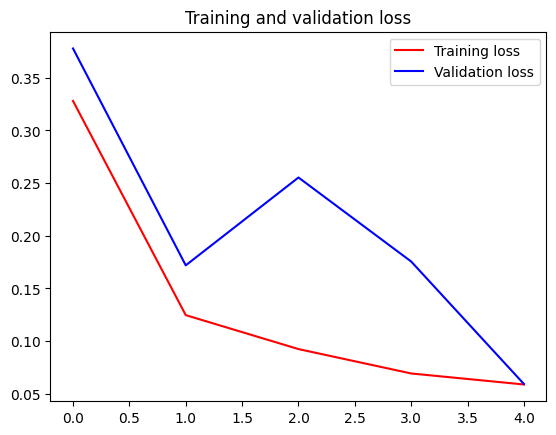

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Save the model

In [12]:
model.save('pneumonia_detection_model.h5')